# Trafficking People Data set
Application of data mining process as a final project for *Data mining* course at _Universidad Nacional de Colombia_.</br>
Profesor on charge _[ELizabeth León Guzmán](https://github.com/elizleon)_ PH. D. at University of Louisville.

Authors of the project
* Juan Manuel Correa Lombana
* Julio Ernesto Quintero Peña

# Classification

Given that the dataset has not a specific class to apply classification, we propose the use of the seven demographic features<br>
features as predictable class and measure the performance of the algorithm for every one

- Gender
- Age Broad
- Majority Status
- Majority Status at Entry
- Majority Status at Exploit
- Citizenship
- Country of Exploitation


In [1]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from utils import (
    load_data,
    eval_metrics,
    make_roc_curve,)
from utils.constants import CATEGORICAL_COLUMNS, AGE_CATE

pd.options.display.max_columns = 50
warnings.simplefilter('ignore')


In [2]:
# Load preprocessed data from previous steps
data_ = load_data('../data/imputed_data.zip', use_cols=False)
numeric_features = data_.columns.difference(CATEGORICAL_COLUMNS)

data_.sample(5)


,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,isForcedLabour,...,isSlaveryAndPractices,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
28981,Female,9--17,Minor,Minor,Minor,US,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,US,0.0,0.0,0.0,0.0,0.0
32072,Male,9--17,Minor,Minor,Minor,KH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KH,0.0,0.0,0.0,1.0,0.0
19300,Female,9--17,Adult,Minor,Minor,PH,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,PH,0.0,0.0,0.0,1.0,0.0
37953,Female,9--17,Adult,Minor,Minor,PH,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,US,1.0,0.0,1.0,1.0,0.0
12104,Male,27--29,Adult,Adult,Adult,MM,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ID,0.0,0.0,0.0,1.0,0.0


## Decision Tree


In [3]:
# Perform Decision Tree for the possible class features
metrics_ = []
for _class in CATEGORICAL_COLUMNS:
    X_train, X_test, y_train, y_test = train_test_split(
        data_[numeric_features],
        data_[_class],
        test_size=.33,
        random_state=42)
    tree_model = DecisionTreeClassifier(
        criterion='entropy',
        min_samples_split=0.2,
        splitter='best')
    tree_model.fit(X_train, y_train)
    prediction = tree_model.predict(X_test)
    metrics = eval_metrics(y_test, prediction)
    metrics['class'] = _class
    metrics_.append(metrics)

# Store in DataFrame score result
metrics_ = pd.DataFrame(metrics_)
metrics_


,f_score,precision,recall,accuracy,class
0,0.415935,0.700404,0.639790,0.782459,gender
1,0.150812,0.463153,0.550089,0.584879,ageBroad
2,0.500000,0.775221,0.873379,0.775221,majorityStatus
3,0.655785,0.755258,0.686345,0.868921,majorityStatusAtExploit
4,0.499812,0.450617,0.947882,0.900927,majorityEntry
5,0.030813,0.381232,0.507927,0.521941,citizenship
6,0.012987,0.724271,0.840089,0.724271,CountryOfExploitation


### Plot Tree

In this section we chose the best and worst performance of the model with the tested class,
the best predictions were achieved by taking as class the feature of _"majorityStatusAtExploit"_ and<br>
the worst predictions were the feature _"citizenship"_.

**Majority Status at Exploit**

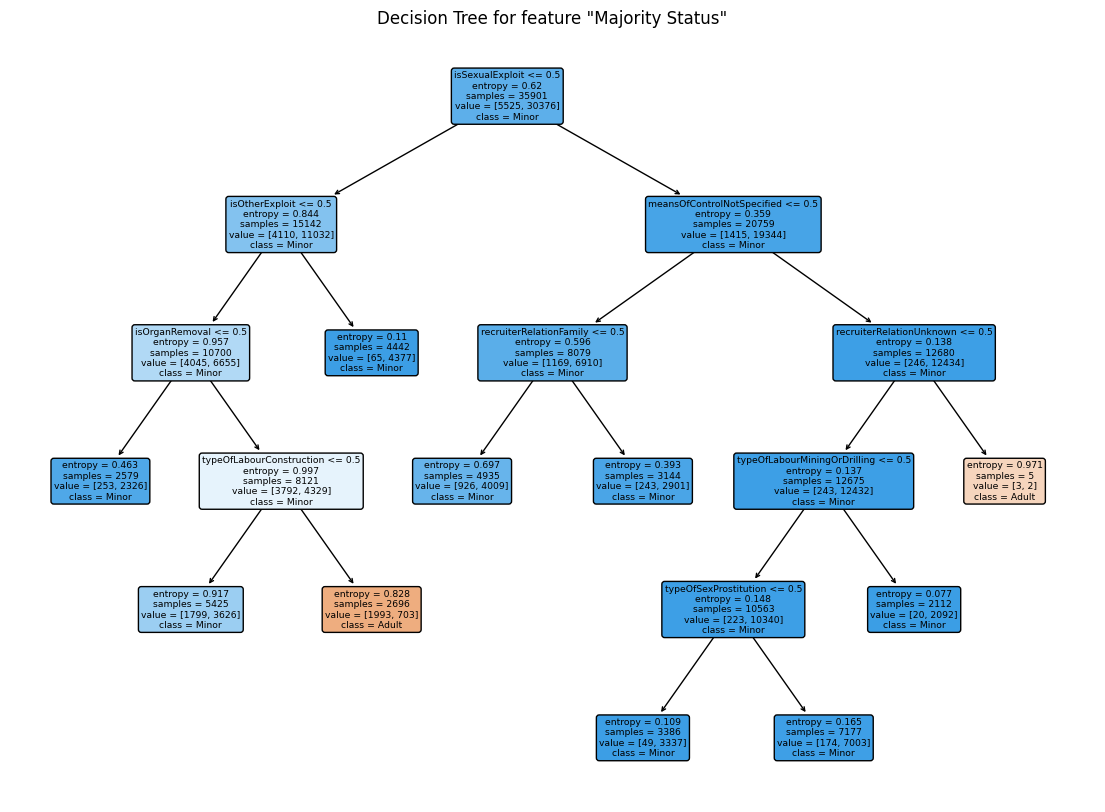

In [4]:
# Split Train an Test data taking as class majorityStatusAtExploit
X_train, X_test, y_train, y_test = train_test_split(
    data_[numeric_features],
    data_['majorityStatusAtExploit'],
    test_size=.33,)

tree_model_majority = DecisionTreeClassifier(
    criterion='entropy',
    min_samples_split=0.2,
    splitter='best')

tree_model_majority.fit(X_train, y_train)

# Plot Tree structure
fig, axs = plt.subplots(1, figsize=(14, 10))
labels = plot_tree(
    tree_model_majority,
    feature_names=X_train.columns.to_list(),
    class_names=AGE_CATE,
    filled=True,
    rounded=True,
    ax=axs)
axs.set_title('Decision Tree for feature "Majority Status"')
plt.show()


**Citizenship**

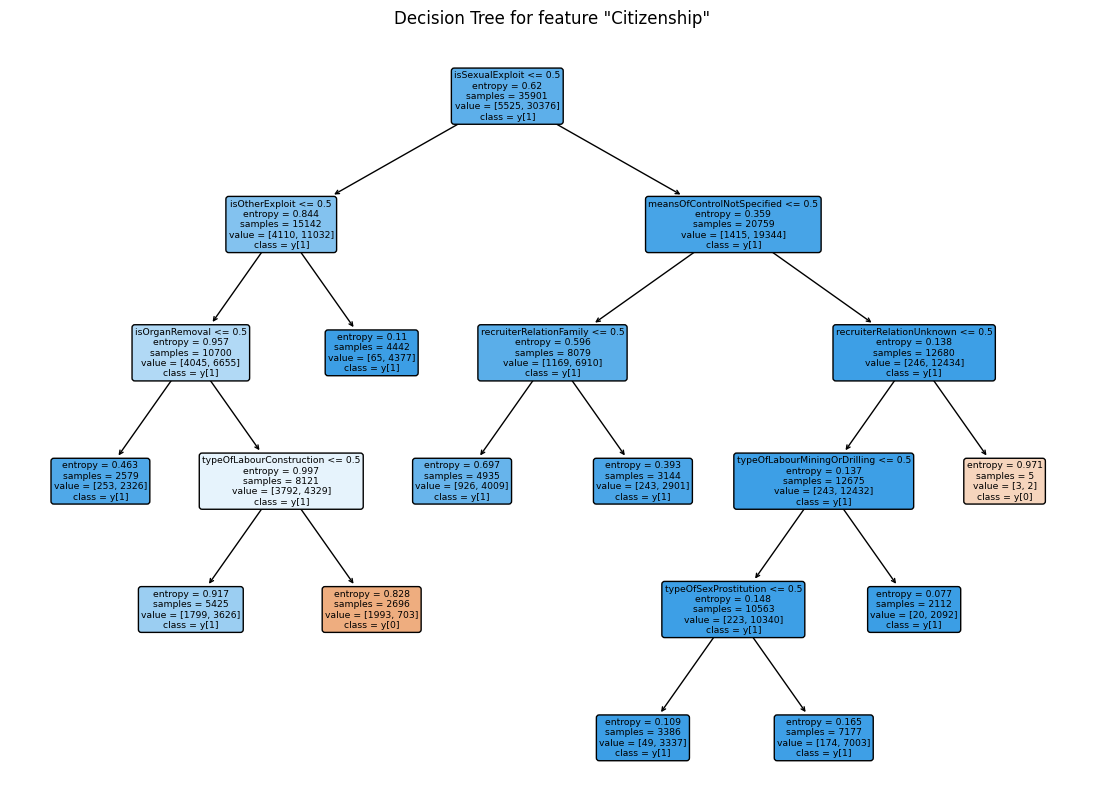

In [5]:
# Split Train an Test data taking as class citizenship
X_train, X_test, y_train, y_test = train_test_split(
    data_[numeric_features],
    data_['citizenship'],
    test_size=.33,)

tree_model_citizenship = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    min_samples_split=0.2)

tree_model_citizenship.fit(X_train, y_train)


# Plot Tree structure
fig, axs = plt.subplots(1, figsize=(14, 10))
labels = plot_tree(
    tree_model_majority,
    feature_names=X_train.columns.to_list(),
    class_names=True,
    filled=True,
    rounded=True,
    ax=axs)
axs.set_title('Decision Tree for feature "Citizenship"')
plt.show()


## K Nearest Neighbors

In [6]:
# Perform K Nearest Neighbors for distinct features class
metrics_ = []
for _class in CATEGORICAL_COLUMNS:
    X_train, X_test, y_train, y_test = train_test_split(
        data_[numeric_features].astype('bool_'),
        data_[_class],
        test_size=.33,
        random_state=42)

    k_model = KNeighborsClassifier(
        metric='jaccard',
        n_jobs=-1)
    k_model.fit(X_train, y_train)
    prediction = k_model.predict(X_test)
    metrics = eval_metrics(y_test, prediction)
    metrics['class'] = _class
    metrics_.append(metrics)

# Store in DataFrame score result
metrics_ = pd.DataFrame(metrics_)
metrics_


,f_score,precision,recall,accuracy,class
0,0.438111,0.683885,0.667277,0.773694,gender
1,0.184894,0.202600,0.187459,0.547953,ageBroad
2,0.566930,0.610944,0.572115,0.756164,majorityStatus
3,0.761515,0.817147,0.785054,0.899061,majorityStatusAtExploit
4,0.839690,0.844085,0.841868,0.944074,majorityEntry
5,0.208607,0.335604,0.351079,0.580921,citizenship
6,0.174189,0.252359,0.439987,0.769962,CountryOfExploitation


## Naive Bayes

In [7]:
# Perform BernoulliNB for distinct features class
metrics_ = []
for _class in CATEGORICAL_COLUMNS:
    X_train, X_test, y_train, y_test = train_test_split(
        data_[numeric_features],
        data_[_class],
        test_size=.33,
        random_state=42)

    bayes_model = BernoulliNB()
    bayes_model.fit(X_train, y_train)
    prediction = bayes_model.predict(X_test)
    metrics = eval_metrics(y_test, prediction)
    metrics['class'] = _class
    metrics_.append(metrics)

# Store in DataFrame score result
metrics_ = pd.DataFrame(metrics_)
metrics_


,f_score,precision,recall,accuracy,class
0,0.522042,0.432288,0.435433,0.691473,gender
1,0.180249,0.183513,0.226769,0.496155,ageBroad
2,0.556602,0.551371,0.552967,0.672020,majorityStatus
3,0.755560,0.684537,0.706918,0.818593,majorityStatusAtExploit
4,0.840860,0.668740,0.701512,0.834031,majorityEntry
5,0.237227,0.185391,0.293980,0.357781,citizenship
6,0.194765,0.189821,0.331501,0.651210,CountryOfExploitation


## Regresión logística

In [8]:
# Perform Logistic Regression for distinct features class
metrics_ = []
for _class in CATEGORICAL_COLUMNS:
    X_train, X_test, y_train, y_test = train_test_split(
        data_[numeric_features],
        data_[_class],
        test_size=.33,
        random_state=42)

    regression = LogisticRegression(
        solver='lbfgs',
        multi_class='ovr',
        n_jobs=-1,)
    regression.fit(X_train, y_train)
    prediction = regression.predict(X_test)
    metrics = eval_metrics(y_test, prediction)
    metrics['class'] = _class
    metrics_.append(metrics)

# Store in DataFrame score result
metrics_ = pd.DataFrame(metrics_)
metrics_


/workspaces/mining-course/.env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspaces/mining-course/.env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

,f_score,precision,recall,accuracy,class
0,0.407441,0.681952,0.624497,0.774090,gender
1,0.136863,0.566291,0.264568,0.597320,ageBroad
2,0.507078,0.710966,0.453384,0.776917,majorityStatus
3,0.706145,0.822257,0.744860,0.891597,majorityStatusAtExploit
4,0.808584,0.856538,0.830296,0.943621,majorityEntry
5,0.165911,0.624497,0.476737,0.613097,citizenship
6,0.131796,0.700436,0.559187,0.798236,CountryOfExploitation


## Models comparison

In [9]:
# Models preparation
tree_model = DecisionTreeClassifier(
    criterion='entropy',
    min_samples_split=0.2,
    splitter='best')

k_model = KNeighborsClassifier(
    metric='jaccard',
    n_jobs=-1)

regression = LogisticRegression(
    max_iter=200,
    solver='newton-cholesky',
    multi_class='ovr',
    n_jobs=-1,)

bayes_model = BernoulliNB()

# Data preparation, selecting a feature as class for all models
# Model selected to compare with the others
X_train, X_test, y_train, y_test = train_test_split(
    data_[numeric_features],
    data_['majorityEntry'],
    test_size=.33,
    random_state=42)

models = (
    (tree_model, 'cyan'),
    (k_model, 'darkseagreen'),
    (regression, 'tan'),
    (bayes_model, 'hotpink'))


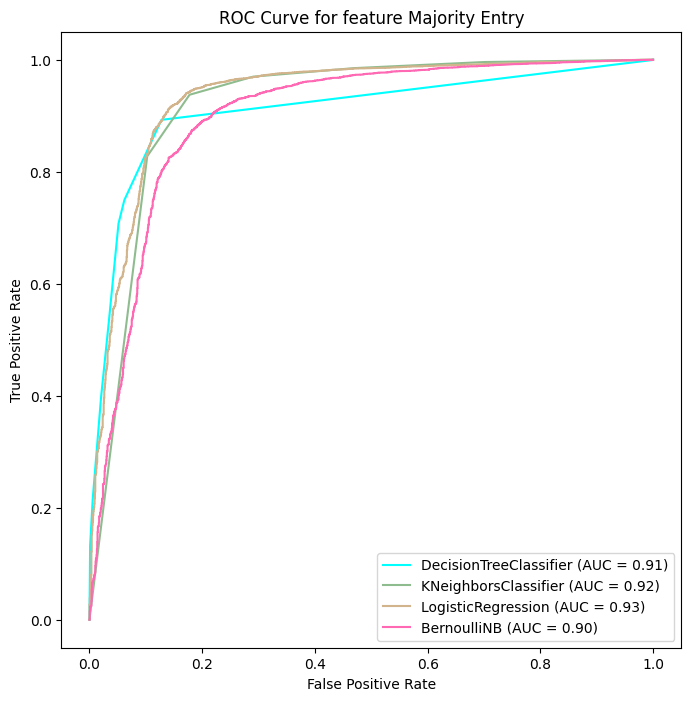

In [10]:
fig, axes = plt.subplots(figsize=(8, 8))
for model, color in models:
    model.fit(X_train, y_train)
    prediction = model.predict_proba(X_test)
    roc_display = make_roc_curve(prediction, y_test, 'Minor', model.__class__.__name__)
    roc_display.plot(ax=axes, color=color)

axes.set_title('ROC Curve for feature Majority Entry')
fig.show()


## Test One-Hot Encoded

In [13]:
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

from utils.constants import MAPPER_FEATURES


In [14]:
# Taking features to make association rules
oht = OneHotEncoder(
    sparse_output=False,
    dtype=np.float64,
    feature_name_combiner=lambda feature, category: MAPPER_FEATURES.get(feature, '{}').format(category),
    handle_unknown='ignore'
)

classification_data_prepared = oht.fit_transform(data_[CATEGORICAL_COLUMNS])
classification_data_prepared = pd.DataFrame(
    classification_data_prepared,
    columns=oht.get_feature_names_out())

classification_data_prepared = pd.concat([classification_data_prepared, data_.drop(columns=CATEGORICAL_COLUMNS)], axis=1)
# classification_data_prepared.sample(10)


In [15]:
# prediciendo meansOfControlDebtBondage
X = classification_data_prepared.drop(['Female'], axis=1)
y = classification_data_prepared['Female']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Inicializar y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = tree_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy}')
print('\nInforme de clasificación:')
print(classification_report(y_test, predictions))


Precisión del modelo: 1.0

Informe de clasificación:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2619
         1.0       1.00      1.00      1.00      8098

    accuracy                           1.00     10717
   macro avg       1.00      1.00      1.00     10717
weighted avg       1.00      1.00      1.00     10717



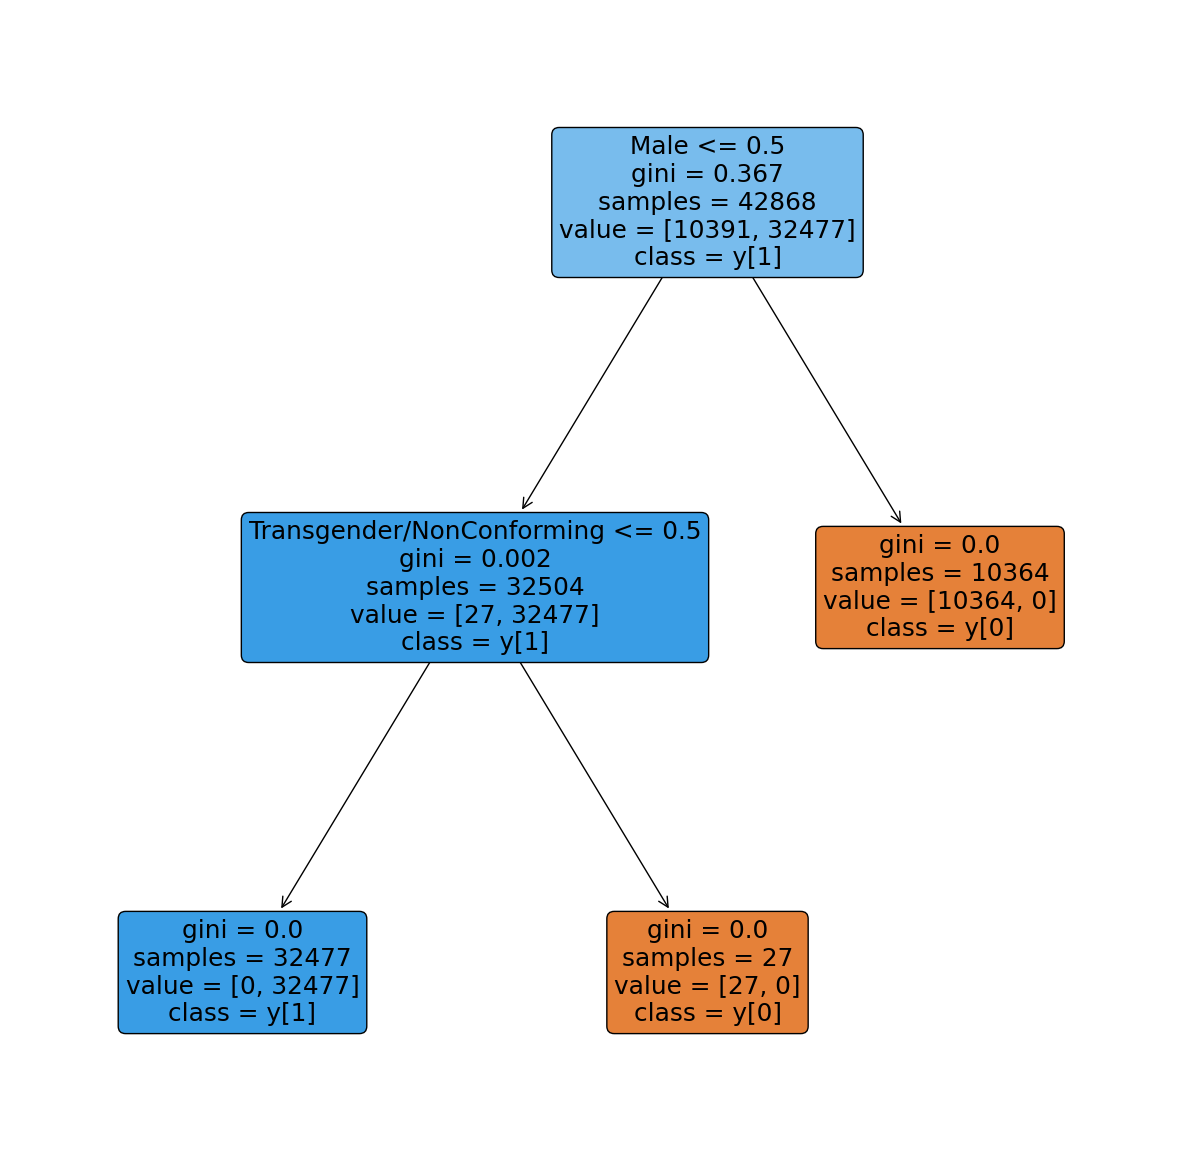

In [17]:
f, axs = plt.subplots(1, figsize=(15, 15))
labels = plot_tree(tree_model, feature_names=X.columns.to_list(), class_names=True, ax=axs, rounded=True, filled=True)
